In [116]:
import pandas as pd
df = pd.read_csv('df_comp14.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,Kevin W Yoder,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2013-12-20,2500.0,Republican,Incumbent
1,1,W Blaine Luetkemeyer,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2013-12-20,1000.0,Republican,Incumbent
2,2,Gerry Connolly,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2013-09-17,1000.0,Democratic,Incumbent
3,3,Emanuel Cleaver,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-04,2500.0,Democratic,Incumbent
4,4,Kevin W Yoder,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-20,1000.0,Republican,Incumbent


In [118]:
#Reduce to Senate
df = df[df['RecipientCommitteeType'].str.contains('Senate', case=False)]

In [76]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.0,Republican,NaN
9,9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.0,Republican,Incumbent
14,14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Republican,Incumbent
15,15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Democratic,NaN
20,20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.0,Republican,Incumbent


In [119]:
#Break out the groups filtered by DonorCommitteeNameNormalized first. 
#Create features (columns) for each, then join to 2018 Spreadsheet of candidates
df['DonorOrganization'].isna().sum()

3

In [120]:
#Drop rows without value for DonorCommittee
df = df.dropna(subset=['DonorOrganization'])
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
5,Susan Collins,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-23,5000.0,Republican,Incumbent
6,Mark Pryor,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-23,2500.0,Democratic,Incumbent
7,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-23,2000.0,Democratic,NaN
8,Mark Begich,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-06-23,2000.0,Democratic,Incumbent
11,Pat Roberts,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2014-10-10,2500.0,Republican,Incumbent


In [121]:
df_chevron = df[df['DonorOrganization'].str.contains('Chevron', case=False)]
df_chevron

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
53635,Susan Collins,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-03,1500.0,Republican,Incumbent
53636,John Cornyn,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-03,5000.0,Republican,Incumbent
53638,Mr James E Risch,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-03,5000.0,Republican,Incumbent
53644,Lindsey Graham,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-03,3000.0,Republican,Incumbent
53647,Pat Roberts,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-03,3000.0,Republican,Incumbent
53649,Mark Begich,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-29,2500.0,Democratic,Incumbent
53657,Timothy Scott,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-29,1000.0,Republican,Incumbent
53666,James Inhofe,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-29,1000.0,Republican,Incumbent
53667,James Paul Lankford,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-05-29,1000.0,Republican,Incumbent
53671,Mary Landrieu,Senate,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,Chevron,CHEVRON EMPLOYEES POLITICAL ACTION COMMITTEE -...,0,NaN,NaN,2013-04-17,1000.0,Democratic,Incumbent


In [122]:
df_chevron['TransactionAmount'].sum()
#About 70% of all Congressional donations

293612.0

In [123]:
# get dataframe linking name to total donations by koch
namegroups = df_chevron.groupby('RecipientCandidateNameNormalized')
df_chevron_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [124]:
# rename column
df_chevron_Senate = df_chevron_Senate.rename(index=str, columns={"TransactionAmount": "chevron14"})
df_chevron_Senate

,chevron14
RecipientCandidateNameNormalized,
Tom Udall,500.0
Timothy Scott,10000.0
Thomas Cotton,5600.0
Thom R Tillis,2500.0
Thad Cochran,15000.0
Terri Lynn Land,10000.0
Susan Collins,3500.0
Steven Daines,13500.0
Shelley Capito,10000.0


In [125]:
df_chevron_Senate['chevron14'].sum()

293612.0

In [126]:
df_chevron_Senate.shape

(38, 1)

In [130]:
df_senate = pd.read_excel('senate_env18_14con.xlsx')
df_senate.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Arch14,Cloud14,Drummond14,Lignite14,NAcoal14,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,1000,5000,0,0,0,0,0,0,500,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,1000,0,0,0,0,0,2500,2000,0,0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,1000,0,0,0,0,0,0,0,0,0


In [128]:
# check if senators appear more than once
(df_senate.RecipientCandidateNameNormalized.value_counts()>1).any()

False

In [131]:
result = pd.merge(df_senate, df_chevron_Senate, how='left', on='RecipientCandidateNameNormalized')
result['chevron14']=result['chevron14'].fillna(0)
result.tail(51)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Cloud14,Drummond14,Lignite14,NAcoal14,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14
49,Senate,MS,Roger Wicker,Republican,Incumbent,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
50,Senate,MT,Jon Tester,Democratic,NaN,93,0,0,0,0,...,1000,0,0,0,0,0,0,0,0,0.0
51,Senate,MT,Steven Daines,Republican,NaN,14,10000,5000,5500,0,...,10000,0,0,0,0,2500,1000,0,2500,13500.0
52,Senate,NC,Richard Burr,Republican,NaN,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
53,Senate,NC,Thom R Tillis,Republican,NaN,7,10000,5000,0,0,...,7000,0,0,0,0,2500,0,0,0,2500.0
54,Senate,ND,Heidi Heitkamp,Democratic,Incumbent,50,0,2500,0,1500,...,1000,0,2500,0,0,2500,0,0,0,0.0
55,Senate,ND,John Hoeven,Republican,NaN,7,0,0,0,0,...,0,0,650,1800,0,0,0,0,0,0.0
56,Senate,NE,Benjamin E Sasse,Republican,NaN,14,10000,7500,0,0,...,0,0,0,0,0,2500,0,0,0,5000.0
57,Senate,NE,Debra S Fischer,Republican,Incumbent,7,0,0,0,2500,...,0,0,0,0,0,0,0,0,0,0.0
58,Senate,NH,Jeanne Shaheen,Democratic,NaN,93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [132]:
result['chevron14'].sum()
#About 80% of Koch's Senate donations in the 2016 cycle went towards candidates who won/ remained in Senate
#Notable losers were ...

197850.0

In [133]:
result['chevron14'].where(result['chevron14'] > 0).count()
#19 of the 24 candidates they donated to won/ remained in Senate

25

In [134]:
#STEWART & STEVENSON
df_stewart = df[df['DonorOrganization'].str.contains('Stewart & Stevenson', case=False)]
df_stewart

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
400191,John Cornyn,Senate,"Ansary, Hushang Hon",Stewart & Stevenson,NaN,4,Individual,Chairman,2014-02-27,2600.0,Republican,Incumbent
400192,John Cornyn,Senate,"Ansary, Hushang Hon",Stewart & Stevenson,NaN,4,Individual,Chairman,2014-02-27,2600.0,Republican,Incumbent
893244,Marion Michael Rounds,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2014-08-22,5200.0,Republican,Open Seat
893245,Marion Michael Rounds,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2014-08-22,-2600.0,Republican,Open Seat
899440,Shelley Capito,Senate,"Ansary, Hushang Hon",Stewart & Stevenson,NaN,4,Individual,Chairman,2013-11-13,2600.0,Republican,Open Seat
903119,Timothy Scott,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2013-12-20,2600.0,Republican,Incumbent
903120,Timothy Scott,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2013-12-20,2600.0,Republican,Incumbent
1035280,Thom R Tillis,Senate,"Ansary, Hushang Honorable",Stewart & Stevenson,NaN,4,Individual,Chairman,2014-06-04,2600.0,Republican,Challenger
1100141,Mary Michelle Nunn,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2013-12-09,2600.0,Democratic,Open Seat
1100143,Mary Michelle Nunn,Senate,"Ansary, Hushang",Stewart & Stevenson,NaN,4,Individual,Chairman,2013-12-09,2600.0,Democratic,Open Seat


In [135]:
df_stewart['TransactionAmount'].sum()
#Marathon Petroleum donated about ..% of Congressional totals in 2016 cycle to Senate. About ..% of count

31200.0

In [136]:
# get dataframe linking name to total donations by Stewart & Stevenson
namegroups = df_stewart.groupby('RecipientCandidateNameNormalized')
df_stewart_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [137]:
# rename column
df_stewart_Senate = df_stewart_Senate.rename(index=str, columns={"TransactionAmount": "stewart14"})
df_stewart_Senate

,stewart14
RecipientCandidateNameNormalized,
Timothy Scott,5200.0
Thom R Tillis,2600.0
Shelley Capito,2600.0
Mary Michelle Nunn,5200.0
Mark M Jacobs,2600.0
Marion Michael Rounds,2600.0
John Cornyn,5200.0
Edward W Gillespie,5200.0


In [138]:
df_stewart_Senate['stewart14'].sum()

31200.0

In [139]:
result2 = pd.merge(result, df_stewart_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['stewart14']=result2['stewart14'].fillna(0)
result2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Drummond14,Lignite14,NAcoal14,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14,stewart14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0,0,0,0,0,500,0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,0,0,0,2500,2000,0,0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,0,0,0,0,0,5600.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0,0,0,1000,0,0,0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [140]:
result2['stewart14'].sum()
#A little over half of ACTBLUE's Senate donations in the 2016 cycle went towards successful candidates

18200.0

In [141]:
result2['stewart14'].where(result2['stewart14'] > 0).count()
#49 of the 86 candidates they donated to won/ remained in Senate

5

In [142]:
#CROWNQUEST
df_crown = df[df['DonorOrganization'].str.contains('Crownquest', case=False)]
print('Crownquest Total 2014 Senate donations: ', df_crown['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_crown.groupby('RecipientCandidateNameNormalized')
df_crown_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_crown_Senate = df_crown_Senate.rename(index=str, columns={"TransactionAmount": "Crown14"})
print('Checking Sums after grouping: ', df_crown_Senate['Crown14'].sum())
print('Candidates Crownquest donated to: ', df_crown_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_crown_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Crown14']=result2['Crown14'].fillna(0)
result2

Crownquest Total 2014 Senate donations:  13300.0
Checking Sums after grouping:  13300.0
Candidates Crownquest donated to:  (2, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Lignite14,NAcoal14,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14,stewart14,Crown14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0,0,0,0,500,0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,0,0,2500,2000,0,0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,0,0,0,0,5600.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0,0,1000,0,0,0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [143]:
#PILOT CORP
df_pilot = df[df['DonorOrganization'].str.contains('Pilot Corp', case=True)]
print('Pilot Corp Total 2014 Senate donations: ', df_pilot['TransactionAmount'].sum())
# get dataframe linking name to total donations by Pilot
namegroups = df_pilot.groupby('RecipientCandidateNameNormalized')
df_pilot_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_pilot_Senate = df_pilot_Senate.rename(index=str, columns={"TransactionAmount": "Pilot14"})
print('Checking Sums after grouping: ', df_pilot_Senate['Pilot14'].sum())
print('Candidates Pilot Corp donated to: ', df_pilot_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_pilot_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Pilot14']=result2['Pilot14'].fillna(0)
result2

Pilot Corp Total 2014 Senate donations:  58520.0
Checking Sums after grouping:  58520.0
Candidates Pilot Corp donated to:  (15, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,NAcoal14,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14,stewart14,Crown14,Pilot14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0,0,0,500,0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,0,2500,2000,0,0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,0,0,0,5600.0,0.0,0.0,2500.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0,1000,0,0,0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [144]:
#Berexco
df_Berex = df[df['DonorOrganization'].str.contains('Berexco', case=False)]
print('Berexco Total 2014 Senate donations: ', df_Berex['TransactionAmount'].sum())
# get dataframe linking name to total donations by Berexco
namegroups = df_Berex.groupby('RecipientCandidateNameNormalized')
df_Berex_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Berex_Senate = df_Berex_Senate.rename(index=str, columns={"TransactionAmount": "Berex14"})
print('Checking Sums after grouping: ', df_Berex_Senate['Berex14'].sum())
print('Candidates Berexco donated to: ', df_Berex_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Berex_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Berex14']=result2['Berex14'].fillna(0)
result2

Berexco Total 2014 Senate donations:  6000.0
Checking Sums after grouping:  6000.0
Candidates Berexco donated to:  (8, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,OHcoal14,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14,stewart14,Crown14,Pilot14,Berex14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0,0,500,0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,2500,2000,0,0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,0,0,5600.0,0.0,0.0,2500.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,1000,0,0,0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [145]:
#Continental Resources
df_Cont = df[df['DonorOrganization'].str.contains('continental resources', case=False)]
print('Continental Resources Total 2014 Senate donations: ', df_Cont['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cont
namegroups = df_Cont.groupby('RecipientCandidateNameNormalized')
df_Cont_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cont_Senate = df_Cont_Senate.rename(index=str, columns={"TransactionAmount": "Cont14"})
print('Checking Sums after grouping: ', df_Cont_Senate['Cont14'].sum())
print('Candidates Continental donated to: ', df_Cont_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cont_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cont14']=result2['Cont14'].fillna(0)
result2

Continental Resources Total 2014 Senate donations:  65500.0
Checking Sums after grouping:  65500.0
Candidates Continental donated to:  (22, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Peabody14,Barrick14,Cliffs14,Newmont14,chevron14,stewart14,Crown14,Pilot14,Berex14,Cont14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0,500,0,0.0,0.0,0.0,0.0,0.0,2600.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,2500,2000,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,0,5600.0,0.0,0.0,2500.0,0.0,2600.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,1000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
#Edison Chouest
df_Edison = df[df['DonorOrganization'].str.contains('Edison Chouest', case=False)]
print('Edison Chouest Total 2014 Senate donations: ', df_Edison['TransactionAmount'].sum())
# get dataframe linking name to total donations by Edison
namegroups = df_Edison.groupby('RecipientCandidateNameNormalized')
df_Edison_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Edison_Senate = df_Edison_Senate.rename(index=str, columns={"TransactionAmount": "Edison14"})
print('Checking Sums after grouping: ', df_Edison_Senate['Edison14'].sum())
print('Candidates Edison Chouest donated to: ', df_Edison_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Edison_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Edison14']=result2['Edison14'].fillna(0)
result2

Edison Chouest Total 2014 Senate donations:  60150.0
Checking Sums after grouping:  60150.0
Candidates Edison Chouest donated to:  (7, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Barrick14,Cliffs14,Newmont14,chevron14,stewart14,Crown14,Pilot14,Berex14,Cont14,Edison14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,500,0,0.0,0.0,0.0,0.0,0.0,2600.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,2000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,0,5600.0,0.0,0.0,2500.0,0.0,2600.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#OTIS EASTERN
df_Otis = df[df['DonorOrganization'].str.contains('otis eastern', case=False)]
print('Otis Eastern Total 2014 Senate donations: ', df_Otis['TransactionAmount'].sum())
# get dataframe linking name to total donations by Otis
namegroups = df_Otis.groupby('RecipientCandidateNameNormalized')
df_Otis_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Otis_Senate = df_Otis_Senate.rename(index=str, columns={"TransactionAmount": "Otis14"})
print('Checking Sums after grouping: ', df_Otis_Senate['Otis14'].sum())
print('Candidates Otis Eastern donated to: ', df_Otis_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Otis_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Otis14']=result2['Otis14'].fillna(0)
result2

Otis Eastern Total 2014 Senate donations:  96575.0
Checking Sums after grouping:  96575.0
Candidates Otis Eastern donated to:  (13, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Cliffs14,Newmont14,chevron14,stewart14,Crown14,Pilot14,Berex14,Cont14,Edison14,Otis14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,500,0,0.0,0.0,0.0,0.0,0.0,2600.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,0,5600.0,0.0,0.0,2500.0,0.0,2600.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
#ALLIANCE COAL
df_AllCoal = df[df['DonorOrganization'].str.contains('alliance coal', case=False)]
print('Alliance Coal Total 2014 Senate donations: ', df_AllCoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Alliance
namegroups = df_AllCoal.groupby('RecipientCandidateNameNormalized')
df_AllCoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_AllCoal_Senate = df_AllCoal_Senate.rename(index=str, columns={"TransactionAmount": "AllCoal14"})
print('Checking Sums after grouping: ', df_AllCoal_Senate['AllCoal14'].sum())
print('Candidates Alliance Coal donated to: ', df_AllCoal_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_AllCoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['AllCoal14']=result2['AllCoal14'].fillna(0)
result2

Alliance Coal Total 2014 Senate donations:  235600.0
Checking Sums after grouping:  235600.0
Candidates Alliance Coal donated to:  (17, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Newmont14,chevron14,stewart14,Crown14,Pilot14,Berex14,Cont14,Edison14,Otis14,AllCoal14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,2600.0,0.0,0.0,7800.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0,5600.0,0.0,0.0,2500.0,0.0,2600.0,0.0,0.0,5200.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
#ALLIANCE RESOURCE
df_AllRes = df[df['DonorOrganization'].str.contains('alliance resource', case=False)]
print('Alliance Resource Total 2014 Senate donations: ', df_AllRes['TransactionAmount'].sum())
# get dataframe linking name to total donations by Alliance
namegroups = df_AllRes.groupby('RecipientCandidateNameNormalized')
df_AllRes_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_AllRes_Senate = df_AllRes_Senate.rename(index=str, columns={"TransactionAmount": "AllRes14"})
print('Checking Sums after grouping: ', df_AllRes_Senate['AllRes14'].sum())
print('Candidates Alliance Resource donated to: ', df_AllRes_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_AllRes_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['AllRes14']=result2['AllRes14'].fillna(0)
result2

Alliance Resource Total 2014 Senate donations:  28500.0
Checking Sums after grouping:  28500.0
Candidates Alliance Resource donated to:  (11, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,chevron14,stewart14,Crown14,Pilot14,Berex14,Cont14,Edison14,Otis14,AllCoal14,AllRes14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2600.0,0.0,0.0,7800.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,5600.0,0.0,0.0,2500.0,0.0,2600.0,0.0,0.0,5200.0,250.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
#MURRAY ENERGY
df_Murray = df[df['DonorOrganization'].str.contains('murray energy', case=False)]
print('Murray Energy Total 2014 Senate donations: ', df_Murray['TransactionAmount'].sum())
# get dataframe linking name to total donations by Murray
namegroups = df_Murray.groupby('RecipientCandidateNameNormalized')
df_Murray_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Murray_Senate = df_Murray_Senate.rename(index=str, columns={"TransactionAmount": "Murray14"})
print('Checking Sums after grouping: ', df_Murray_Senate['Murray14'].sum())
print('Candidates Murray Energy donated to: ', df_Murray_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Murray_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Murray14']=result2['Murray14'].fillna(0)
result2

Murray Energy Total 2014 Senate donations:  370917.0
Checking Sums after grouping:  370917.0
Candidates Murray Energy donated to:  (31, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,stewart14,Crown14,Pilot14,Berex14,Cont14,Edison14,Otis14,AllCoal14,AllRes14,Murray14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0.0,0.0,0.0,0.0,2600.0,0.0,0.0,7800.0,0.0,18400.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0.0,0.0,0.0,0.0,0.0,1250.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0.0,0.0,2500.0,0.0,2600.0,0.0,0.0,5200.0,250.0,8750.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
#NATIONAL MINING
df_NatMin = df[df['DonorOrganization'].str.contains('national mining', case=False)]
print('National Mining Total 2014 Senate donations: ', df_NatMin['TransactionAmount'].sum())
# get dataframe linking name to total donations by National Mining
namegroups = df_NatMin.groupby('RecipientCandidateNameNormalized')
df_NatMin_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_NatMin_Senate = df_NatMin_Senate.rename(index=str, columns={"TransactionAmount": "NatMin14"})
print('Checking Sums after grouping: ', df_NatMin_Senate['NatMin14'].sum())
print('Candidates National Mining donated to: ', df_NatMin_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_NatMin_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['NatMin14']=result2['NatMin14'].fillna(0)
result2

National Mining Total 2014 Senate donations:  145850.0
Checking Sums after grouping:  145850.0
Candidates National Mining donated to:  (33, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Crown14,Pilot14,Berex14,Cont14,Edison14,Otis14,AllCoal14,AllRes14,Murray14,NatMin14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0.0,0.0,0.0,2600.0,0.0,0.0,7800.0,0.0,18400.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0.0,0.0,0.0,0.0,1250.0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,0.0,2500.0,0.0,2600.0,0.0,0.0,5200.0,250.0,8750.0,6000.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
#FREEPORT MCMORAN
df_FreeMc = df[df['DonorOrganization'].str.contains('freeport mcmoran', case=False)]
print('Freeport McMoran Total 2014 Senate donations: ', df_FreeMc['TransactionAmount'].sum())
# get dataframe linking name to total donations by Freeport
namegroups = df_FreeMc.groupby('RecipientCandidateNameNormalized')
df_FreeMc_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_FreeMc_Senate = df_FreeMc_Senate.rename(index=str, columns={"TransactionAmount": "FreeMc14"})
print('Checking Sums after grouping: ', df_FreeMc_Senate['FreeMc14'].sum())
print('Candidates Freeport McMoran donated to: ', df_FreeMc_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_FreeMc_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['FreeMc14']=result2['FreeMc14'].fillna(0)
result2

Freeport McMoran Total 2014 Senate donations:  186149.0
Checking Sums after grouping:  186149.0
Candidates Freeport McMoran donated to:  (30, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch14,MarPet14,MarOil14,EnTrans14,...,Pilot14,Berex14,Cont14,Edison14,Otis14,AllCoal14,AllRes14,Murray14,NatMin14,FreeMc14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,10000,0,0,0,...,0.0,0.0,2600.0,0.0,0.0,7800.0,0.0,18400.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,2500,...,0.0,0.0,0.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,5000,5000,2500,0,...,2500.0,0.0,2600.0,0.0,0.0,5200.0,250.0,8750.0,6000.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5500.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21800.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
result2.to_excel('senate_env18_14con.xlsx')

In [154]:
result = pd.read_excel('senate_env18_14pro.xlsx')
result

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV14,Sierra14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0


In [155]:
#NATURE CONSERVANCY
df_Nature = df[df['DonorOrganization'].str.contains('nature conservancy', case=False)]
print('Nature Conservancy Total 2014 Senate donations: ', df_Nature['TransactionAmount'].sum())
# get dataframe linking name to total donations by NC
namegroups = df_Nature.groupby('RecipientCandidateNameNormalized')
df_Nature_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Nature_Senate = df_Nature_Senate.rename(index=str, columns={"TransactionAmount": "Nature14"})
print('Checking Sums after grouping: ', df_Nature_Senate['Nature14'].sum())
print('Nature Conservancy donated to: ', df_Nature_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_Nature_Senate, how='left', on='RecipientCandidateNameNormalized')
result['Nature14']=result['Nature14'].fillna(0)
result

Nature Conservancy Total 2014 Senate donations:  17950.0
Checking Sums after grouping:  17950.0
Nature Conservancy donated to:  (9, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV14,Sierra14,Nature14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0


In [156]:
#ENVIRONMENTAL DEFENSE FUND
df_EDF = df[df['DonorOrganization'].str.contains('environmental defense', case=False)]
print('Environmental Defense Fund Total 2014 Senate donations: ', df_EDF['TransactionAmount'].sum())
# get dataframe linking name to total donations by EDF
namegroups = df_EDF.groupby('RecipientCandidateNameNormalized')
df_EDF_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EDF_Senate = df_EDF_Senate.rename(index=str, columns={"TransactionAmount": "EDF14"})
print('Checking Sums after grouping: ', df_EDF_Senate['EDF14'].sum())
print('EDF donated to: ', df_EDF_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_EDF_Senate, how='left', on='RecipientCandidateNameNormalized')
result['EDF14']=result['EDF14'].fillna(0)
result

Environmental Defense Fund Total 2014 Senate donations:  85192.0
Checking Sums after grouping:  85192.0
EDF donated to:  (14, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV14,Sierra14,Nature14,EDF14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0


In [157]:
#GLOBAL GREEN USA
df_GloGreen = df[df['DonorOrganization'].str.contains('global green usa', case=False)]
print('Global Green USA Total 2014 Senate donations: ', df_GloGreen['TransactionAmount'].sum())
# get dataframe linking name to total donations by GloGreen
namegroups = df_GloGreen.groupby('RecipientCandidateNameNormalized')
df_GloGreen_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_GloGreen_Senate = df_GloGreen_Senate.rename(index=str, columns={"TransactionAmount": "GloGreen14"})
print('Checking Sums after grouping: ', df_GloGreen_Senate['GloGreen14'].sum())
print('GloGreen donated to: ', df_GloGreen_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_GloGreen_Senate, how='left', on='RecipientCandidateNameNormalized')
result['GloGreen14']=result['GloGreen14'].fillna(0)
result

Global Green USA Total 2014 Senate donations:  3600.0
Checking Sums after grouping:  3600.0
GloGreen donated to:  (2, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV14,Sierra14,Nature14,EDF14,GloGreen14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0


In [158]:
#ENVIRONMENT AMERICA
df_EnvAm = df[df['DonorOrganization'].str.contains('environment america', case=False)]
print('Global Green USA Total 2014 Senate donations: ', df_EnvAm['TransactionAmount'].sum())
# get dataframe linking name to total donations by EnvAm
namegroups = df_EnvAm.groupby('RecipientCandidateNameNormalized')
df_EnvAm_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EnvAm_Senate = df_EnvAm_Senate.rename(index=str, columns={"TransactionAmount": "EnvAm14"})
print('Checking Sums after grouping: ', df_EnvAm_Senate['EnvAm14'].sum())
print('EnvAm donated to: ', df_EnvAm_Senate.shape)
# merging with earlier spreadsheet
result = pd.merge(result, df_EnvAm_Senate, how='left', on='RecipientCandidateNameNormalized')
result['EnvAm14']=result['EnvAm14'].fillna(0)
result

Global Green USA Total 2014 Senate donations:  42500.0
Checking Sums after grouping:  42500.0
EnvAm donated to:  (14, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV14,Sierra14,Nature14,EDF14,GloGreen14,EnvAm14
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0,0.0


In [159]:
result.to_excel('senate_env18_14pro.xlsx')

In [2]:
import pandas as pd 
df_env12 = pd.read_excel('senate_env12.xlsx')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [3]:
df_env12[df_env12['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100


In [18]:
#df_env12(['RecipientCandidateParty']).str.replace('Independent', 'Democratic', regex=False)
df_env12 = df_env12.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [55]:
df_env18 = pd.read_excel('senate_env18.xlsx')
df_env18.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,0,8000
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,10000,10000
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,10000,10000


In [56]:
df_env18 = df_env18.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env18.nunique()

RecipientCandidateOffice              1
RecipientCandidateOfficeState        50
RecipientCandidateNameNormalized    100
RecipientCandidateParty               2
RecipientCandidateICO                 3
LCV_Score                            12
LeagueOfConservation16               17
ACTBLUE16                            50
ClubGrowth16                         14
SenCons16                             2
Koch16                                7
Exxon16                               8
dtype: int64

In [59]:
X12_Rep = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Republican']]
len(X12_Rep[0])
X12_Rep = X12_Rep[0]

In [60]:
X12_Dem = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Democratic']]
len(X12_Dem[0])
X12_Dem = X12_Dem[0]

In [61]:
X18_Rep = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Republican']]
len(X18_Rep[0])
X18_Rep = X18_Rep[0]

In [62]:
X18_Dem = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Democratic']]
len(X18_Dem[0])
X18_Dem = X18_Dem[0]

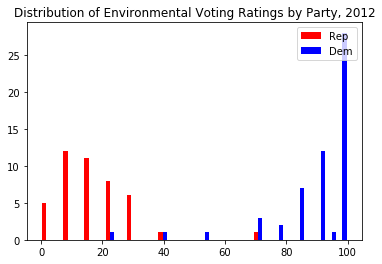

In [82]:
import numpy as np
import matplotlib.pyplot as plt
#plt.hist(X12_Rep, 20, density=True, facecolor='r', alpha=0.75)
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
#pyplot.show()
bins = np.linspace(0, 100, 30)
colors = ['r','b']
plt.hist([X12_Rep, X12_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2012')
plt.legend(loc='upper right')
plt.show()

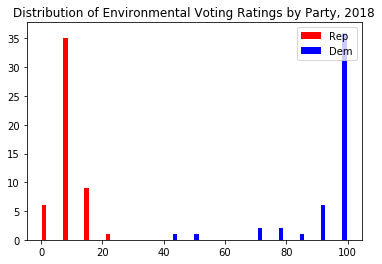

In [83]:
bins = np.linspace(0, 100, 30)
plt.hist([X18_Rep, X18_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2018')
plt.legend(loc='upper right')
plt.show()